In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random as rand
import choix
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from scipy.stats import spearmanr
from itertools import product

# Parameters

In [11]:
N   = [100, 200]                                       # Total number of items
PR  = range(1, 21, 1)                                  # Ratio of pairs to items
NOS = [0, .1]                                          # Noise level
SC  = 40                                               # Simulation count
M   = ['SIM_rank', 'SVC_rank', 'BTL_rank', 'LOG_rank'] # Methods to use

# Data Generation

In [12]:
def generate_data(N, OBS, NOS, M):
    if M in ['SVC_rank', 'SIM_rank', 'LOG_rank']:
        return generate_svc_data(N, OBS, NOS)
    return generate_pairs(N, OBS, NOS), None

def generate_pairs(N, OBS, NOS):
    """Random pair generator.
    
    @param N: Number of items.
    @param OBS: Number of pairs.
    """
    
    # Randomly choose pair indexes
    poss_pairs = [(x, y) for x in range(N) for y in range(N) if x < y]
    pairs = rand.sample(poss_pairs, OBS)
    pairs = [(x, y) if rand.random() > NOS else (y, x) for x, y in pairs]
    
    return pairs

def generate_svc_data(N, OBS, NOS):
    """Random one-hot encoding comparison data generation.
    
    @param N: Number of items.
    @param OBS: Number of pairs.
    @NOS: Noise level 0.0-1.0
    @CPP: Comparisons per pair.
    """
    
    # Randomly choose pair 
    pairs = generate_pairs(N, OBS, 0)
    
    # One-hot encoding
    idy = np.identity(N)
    X = np.array(list(map(lambda x:idy[x[0]] - idy[x[1]], pairs)))
    y = np.array([1 if (rand.random() > NOS) else -1 for i in range(OBS)])
    
    # Balance class labels by randomly flipping comparison direction
    flip = (np.random.binomial(1, 0.5, OBS) * 2 - 1).reshape(OBS, 1)
    X = np.multiply(flip, X)
    y = np.multiply(flip, y.reshape(OBS, 1)).ravel()
    
    return X, y

# Ranking

In [13]:
def SVC_rank(X, Y):
    cls = LinearSVC()
    model = cls.fit(X, Y)
    n_classes = model.coef_.shape[0]
    
    weights = [i for i in range(1, n_classes + 1)]
    res = np.average(model.coef_, axis=0, weights=weights)
    ranks = np.flip(np.argsort(res), axis=0)
    
    return ranks

def LOG_rank(X, Y):
    cls = LogisticRegression()
    model = cls.fit(X, Y)
    n_classes = model.coef_.shape[0]
    
    weights = [i for i in range(1, n_classes + 1)]
    res = np.average(model.coef_, axis=0, weights=weights)
    ranks = np.flip(np.argsort(res), axis=0)
    
    return ranks

def BTL_rank(X, y):
    s = set()
    for x, y in X:
        s.add(x)
        s.add(y)
    
    params = choix.ilsr_pairwise(max(s) + 1, X, alpha=0.3, max_iter=10000)
    ranks = np.argsort(params)
    return ranks

def SIM_rank(X, y):
    res = np.matmul(y, X)
    ranks = np.argsort(res)
    
    return ranks

# Simulation

In [14]:
sim = pd.DataFrame()

for n, pr, nos, m in product(N, PR, NOS, M):
    print('{} items, {} ratio, {} noise, {} method'.format(n, pr, nos, m))
    
    corrs = []
    for i in range(SC):
        X, y = generate_data(n, pr * n, nos, m)
        ranks = locals()[m](X, y)
        corr = spearmanr(ranks, [i for i in range(len(ranks))])[0]
        corrs.append(abs(corr))
        
    sim = sim.append({
        'corr': np.mean(corrs),
        'method': m,
        'noise': nos,
        'items': n,
        'pairs_per_item': pr
    }, ignore_index=True)

100 items, 1 ratio, 0 noise, SIM_rank method
100 items, 1 ratio, 0 noise, SVC_rank method
100 items, 1 ratio, 0 noise, BTL_rank method
100 items, 1 ratio, 0 noise, LOG_rank method
100 items, 1 ratio, 0.1 noise, SIM_rank method
100 items, 1 ratio, 0.1 noise, SVC_rank method
100 items, 1 ratio, 0.1 noise, BTL_rank method
100 items, 1 ratio, 0.1 noise, LOG_rank method
100 items, 2 ratio, 0 noise, SIM_rank method
100 items, 2 ratio, 0 noise, SVC_rank method
100 items, 2 ratio, 0 noise, BTL_rank method
100 items, 2 ratio, 0 noise, LOG_rank method
100 items, 2 ratio, 0.1 noise, SIM_rank method
100 items, 2 ratio, 0.1 noise, SVC_rank method
100 items, 2 ratio, 0.1 noise, BTL_rank method
100 items, 2 ratio, 0.1 noise, LOG_rank method
100 items, 3 ratio, 0 noise, SIM_rank method
100 items, 3 ratio, 0 noise, SVC_rank method
100 items, 3 ratio, 0 noise, BTL_rank method
100 items, 3 ratio, 0 noise, LOG_rank method
100 items, 3 ratio, 0.1 noise, SIM_rank method
100 items, 3 ratio, 0.1 noise, SVC_ra

200 items, 3 ratio, 0 noise, SVC_rank method
200 items, 3 ratio, 0 noise, BTL_rank method
200 items, 3 ratio, 0 noise, LOG_rank method
200 items, 3 ratio, 0.1 noise, SIM_rank method
200 items, 3 ratio, 0.1 noise, SVC_rank method
200 items, 3 ratio, 0.1 noise, BTL_rank method
200 items, 3 ratio, 0.1 noise, LOG_rank method
200 items, 4 ratio, 0 noise, SIM_rank method
200 items, 4 ratio, 0 noise, SVC_rank method
200 items, 4 ratio, 0 noise, BTL_rank method
200 items, 4 ratio, 0 noise, LOG_rank method
200 items, 4 ratio, 0.1 noise, SIM_rank method
200 items, 4 ratio, 0.1 noise, SVC_rank method
200 items, 4 ratio, 0.1 noise, BTL_rank method
200 items, 4 ratio, 0.1 noise, LOG_rank method
200 items, 5 ratio, 0 noise, SIM_rank method
200 items, 5 ratio, 0 noise, SVC_rank method
200 items, 5 ratio, 0 noise, BTL_rank method
200 items, 5 ratio, 0 noise, LOG_rank method
200 items, 5 ratio, 0.1 noise, SIM_rank method
200 items, 5 ratio, 0.1 noise, SVC_rank method
200 items, 5 ratio, 0.1 noise, BTL_

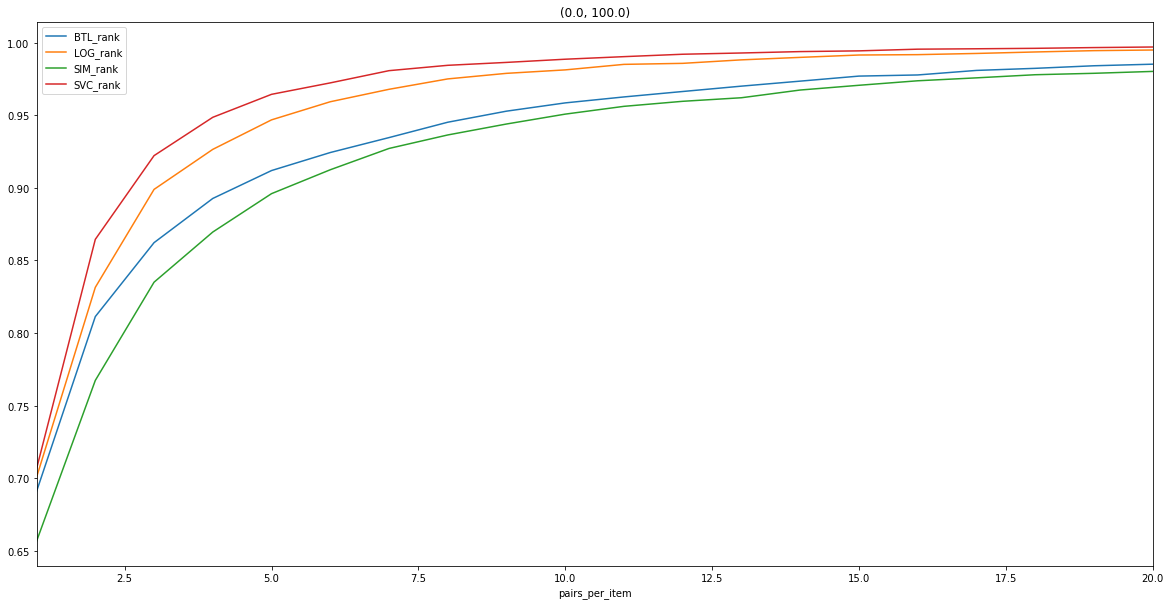

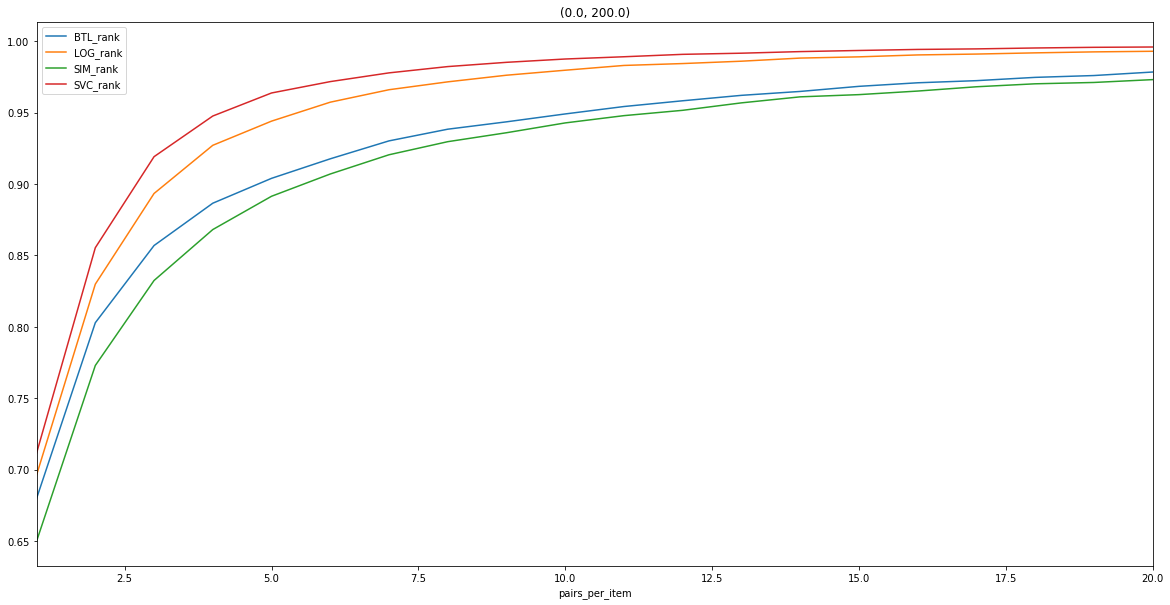

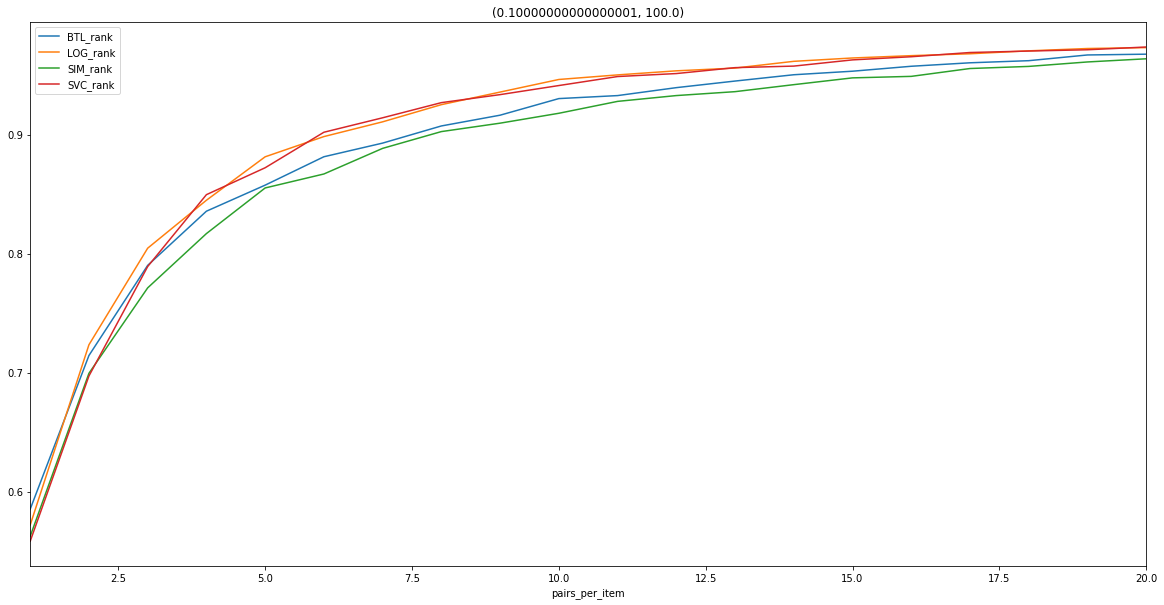

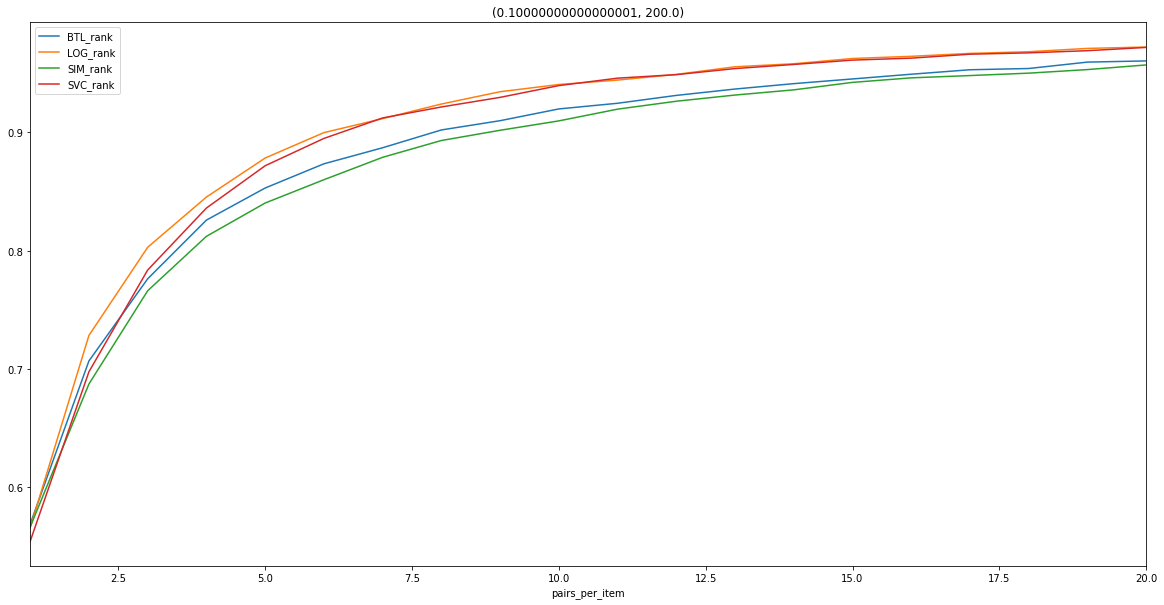

In [15]:
for name1, group1 in sim.groupby(['noise', 'items']):
    fig = plt.figure(figsize=(20, 10))
    ax = fig.add_subplot(1,1,1)
    
    for name2, group2 in group1.groupby('method'):
        group2.plot(kind='line', x='pairs_per_item', y='corr', ax=ax, label=name2)
        
    ax.set_title(str(name1))
    
plt.show()